In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("iris.data.csv")

In [3]:
df.head(3)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

<AxesSubplot:>

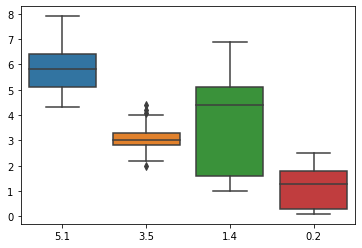

In [7]:
sns.boxplot(data=df)

In [8]:
df[df["3.5"]>4]

,5.1,3.5,1.4,0.2,Iris-setosa
14,5.7,4.4,1.5,0.4,Iris-setosa
31,5.2,4.1,1.5,0.1,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa


In [9]:
df[df["3.5"]==2]

,5.1,3.5,1.4,0.2,Iris-setosa
59,5.0,2.0,3.5,1.0,Iris-versicolor


In [10]:
df.drop([14,31,32,59],axis=0,inplace=True)

<AxesSubplot:>

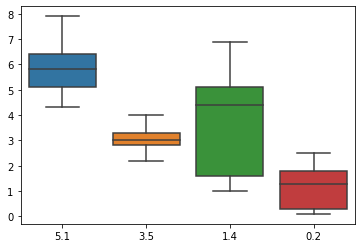

In [11]:
sns.boxplot(data=df)

In [12]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
features=df.iloc[:,:-1]
features.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [14]:
target=df.iloc[:,-1]
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 145, dtype: object

In [15]:
from scipy.stats import skew

5.1
0.2633445967124602


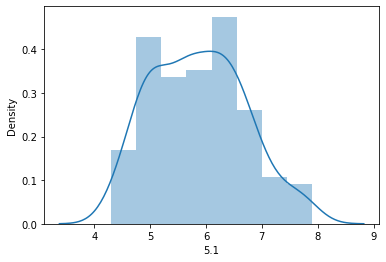

3.5
0.1539971160399899


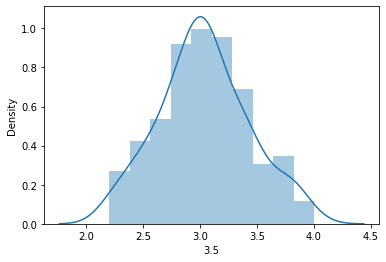

1.4
-0.33600380567867444


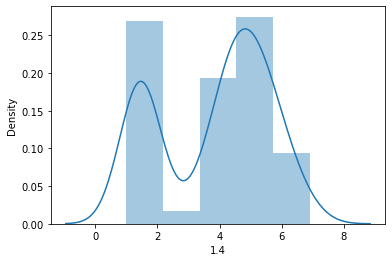

0.2
-0.16050088432825227


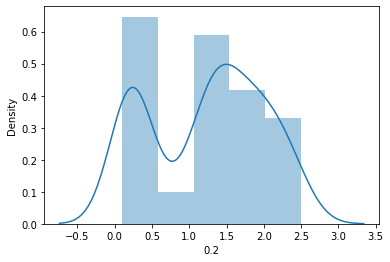

In [16]:
for i in features:
    print(i)
    print(skew(features[i]))
    plt.figure()
    sns.distplot(features[i])
    plt.show()

In [17]:
features["5.1"]=np.log(features["5.1"])

In [18]:
features["3.5"]=np.log(features["3.5"])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()


In [21]:
le.fit_transform(target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sd=StandardScaler()

In [24]:
features=sd.fit_transform(features)

In [25]:
features=pd.DataFrame(features)

In [26]:
features

,0,1,2,3
0,-1.192999,-0.020770,-1.388693,-1.359047
1,-1.486786,0.472581,-1.445979,-1.359047
2,-1.638402,0.229885,-1.331407,-1.359047
3,-1.050572,1.372948,-1.388693,-1.359047
4,-0.508006,1.984817,-1.216834,-1.094357
...,...,...,...,...
140,1.012713,-0.020770,0.788177,1.420200
141,0.578737,-1.414488,0.673605,0.890820
142,0.799064,-0.020770,0.788177,1.023165
143,0.465937,0.936013,0.902749,1.420200


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(features,target,test_size=0.2,random_state=1)

In [33]:
def algorithm(algo):
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    
    train=algo.score(xtrain,ytrain)
    test=algo.score(xtest,ytest)
    print(f"TrainingAccuracy: {train}\n Testin Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    return algo

In [34]:
from sklearn.metrics import classification_report

In [35]:
from sklearn.svm import SVC
svm=algorithm(SVC())

TrainingAccuracy: 0.9655172413793104
 Testin Accuracy: 1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



In [36]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [38]:
pipe=Pipeline(
steps=[
    ("svm",SVC())
])

In [39]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



In [44]:
train=pipe.score(xtrain,ytrain)
test=pipe.score(xtest,ytest)
print(f"Training: {train}\n test:{test}")

Training: 0.9655172413793104
 test:1.0


In [45]:
from sklearn.model_selection import GridSearchCV


In [51]:
prameters={
    "C":[0.1,1,10],
    "gamma":[0.1,0.01,0.001],
    "kernel":["rbf"]
}

In [52]:
grid=GridSearchCV(SVC(),prameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [53]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [54]:
grid.best_score_

0.9565217391304348

In [55]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [56]:
svm=grid.best_estimator_
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



In [58]:
train=svm.score(xtrain,ytrain)
test=svm.score(xtest,ytest)
print(f"Training: {train}\n test:{test}")

Training: 0.9741379310344828
 test:1.0
